(exercises)=

# Exercises

Now we turn to exercises. It is important that you complete them before
continuing, since they present new concepts we will need.

### Exercise 1

Your first task is to simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

The sequence of shocks $\{\epsilon_t\}$ is assumed to be IID and
standard normal.

In your solution, restrict your import statements to

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set $T=200$ and $\alpha = 0.9$.

### Exercise 2

Starting with your solution to exercise 2, plot three simulated time
series, one for each of the cases $\alpha=0$, $\alpha=0.8$ and
$\alpha=0.98$.

Use a `for` loop to step through the $\alpha$ values.

If you can, add a legend, to help distinguish between the three time
series.

Hints:

-   If you call the `plot()` function multiple times before calling
    `show()`, all of the lines you produce will end up on the same
    figure.
-   For the legend, noted that the expression `'foo' + str(42)`
    evaluates to `'foo42'`.

### Exercise 3

Similar to the previous exercises, plot the time series

$$
x_{t+1} = \alpha \, |x_t| + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

Use $T=200$, $\alpha = 0.9$ and $\{\epsilon_t\}$ as before.

Search online for a function that can be used to compute the absolute
value $|x_t|$.

### Exercise 4

One important aspect of essentially all programming languages is
branching and conditions.

In Python, conditions are usually implemented with if--else syntax.

Here\'s an example, that prints -1 for each negative number in an array
and 1 for each nonnegative number

In [23]:
numbers = [-9, 2.3, -11, 0]

In [24]:
for x in numbers:
    if x < 0:
        print(-1)
    else:
        print(1)

-1
1
-1
1


Now, write a new solution to Exercise 3 that does not use an existing
function to compute the absolute value.

Replace this existing function with an if--else condition.

(pbe_ex3)=

### Exercise 5

Here\'s a harder exercise, that takes some thought and planning.

The task is to compute an approximation to $\pi$ using [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method).

Use no imports besides

In [25]:
import numpy as np

Your hints are as follows:

-   If $U$ is a bivariate uniform random variable on the unit square
    $(0, 1)^2$, then the probability that $U$ lies in a subset $B$ of
    $(0,1)^2$ is equal to the area of $B$.
-   If $U_1,\ldots,U_n$ are IID copies of $U$, then, as $n$ gets large,
    the fraction that falls in $B$, converges to the probability of
    landing in $B$.
-   For a circle, $area = \pi * radius^2$.

## Solutions

### Exercise 1

Here\'s one solution.

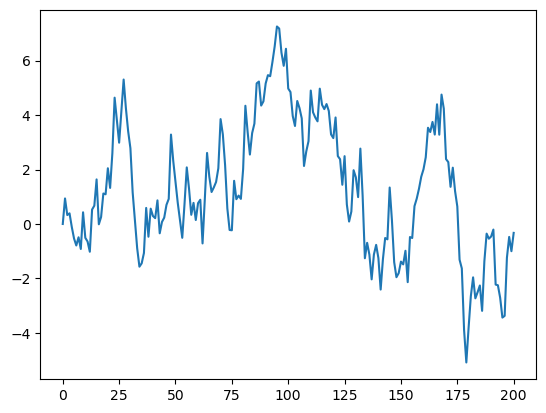

In [24]:


α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * x[t] + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 2

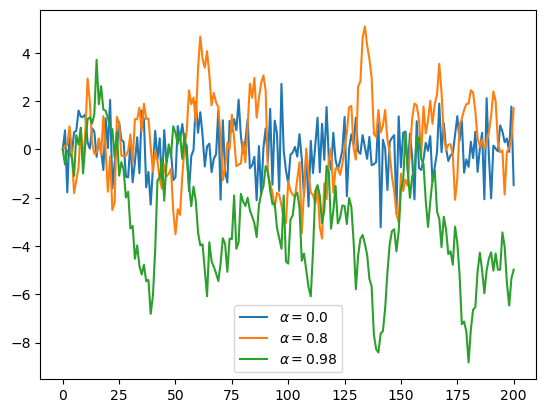

In [35]:

α_values = [0.0, 0.8, 0.98]
T = 200
x = np.empty(T+1)

for α in α_values:
    x[0] = 0
    for t in range(T):
        x[t+1] = α * x[t] + np.random.randn()
    plt.plot(x, label=f'$\\alpha = {α}$')

plt.legend()
plt.show()

### Exercise 3

Here\'s one solution:

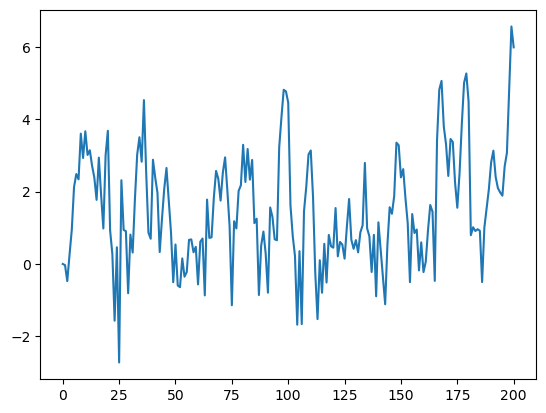

In [38]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * np.abs(x[t]) + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 4

Here\'s one way:

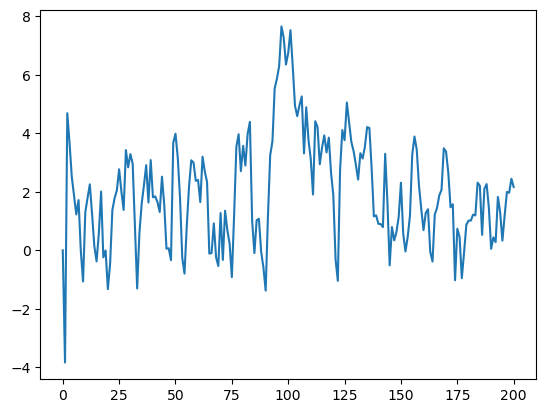

In [39]:
# Set a seed
#seed_value = 42
#np.random.seed(seed_value)


α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    if x[t] < 0:
        abs_x = - x[t]
    else:
        abs_x = x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

Here\'s a shorter way to write the same thing:

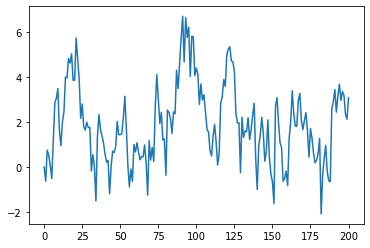

In [30]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    abs_x = - x[t] if x[t] < 0 else x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 5

Consider the circle of diameter 1 embedded in the unit square.

Let $A$ be its area and let $r=1/2$ be its radius.

If we know $\pi$ then we can compute $A$ via $A = \pi r^2$.

But here the point is to compute $\pi$, which we can do by
$\pi = A / r^2$.

Summary: If we can estimate the area of a circle with diameter 1, then
dividing by $r^2 = (1/2)^2 = 1/4$ gives an estimate of $\pi$.

We estimate the area by sampling bivariate uniforms and looking at the
fraction that falls into the circle.

In [48]:
n = 10

# Initialize the count of points inside the quarter circle
count = 0
for i in range(n):
    u, v = np.random.uniform(), np.random.uniform()
    # Check if the point is inside the quarter circle (x^2 + y^2 <= 1)
    if u**2 + v**2 <= 1:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.140212


### Exercise 6 

Python is a powerful tool to download and manage large amounts of data. To have an idea of its potential, let's build a simple notebook that replicates a recent [FRED blog post](https://fredblog.stlouisfed.org/2023/09/above-average-wage-growth-in-the-leisure-and-hospitality-industry/). Unlike previous exercises, here we need a third-party library so please start by opening anaconda prompt and run `conda install pip`. You should then be able to run directly in your notebook:

In [ ]:
!conda install pip
!pip install fredapi

In [9]:
import pandas as pd
from fredapi import Fred
fred = Fred(api_key='851655a090dc0e677c308e782fcb3a75')
seriesid = ['FRBATLWGT12MMUMHGO',	'FRBATLWGT12MMUMHWGILH']
data = pd.DataFrame()
for j in range(0,len(seriesid)):
    data_j = fred.get_series(seriesid[j])
    data[seriesid[j]] = data_j


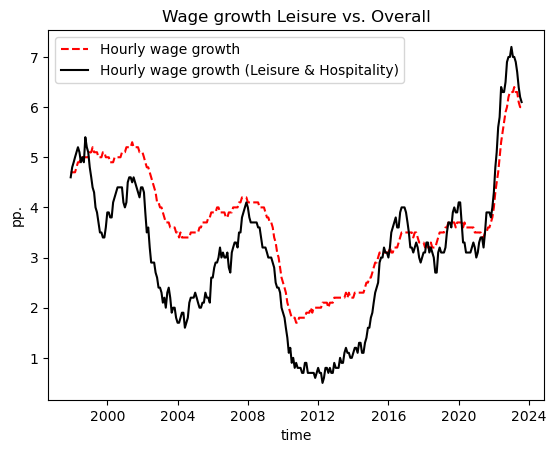

In [10]:

import matplotlib.pyplot as plt
# Create a plot
fig, ax = plt.subplots()

# Plot the first line (dashed and red)
ax.plot(data.index, data['FRBATLWGT12MMUMHGO'], linestyle='--', color='red', label='Hourly wage growth')

# Plot the second line (solid and black)
ax.plot(data.index, data['FRBATLWGT12MMUMHWGILH'], linestyle='-', color='black', label='Hourly wage growth (Leisure & Hospitality)')

# Add labels and a legend
ax.set_xlabel('time')
ax.set_ylabel('pp.')
ax.set_title('Wage growth Leisure vs. Overall')
ax.legend()

# Show the plot
plt.show()

